In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
import re
import fileinput
import csv
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer;
from sklearn.decomposition import NMF;
from sklearn.preprocessing import normalize;
import pickle;
import datetime
from datetime import datetime

#Importing all the libraries 

#importing the dataset 
data = pd.read_csv('tweetWLM.csv')

#Display dataset
data

id  tweet_id                                              tweet  \
0    NaN         1  RT @chiakiasami: 🇺🇸銃社会の理由が理解できた気がします...\n#Whit...   
1    NaN         2  RT @chiakiasami: 黒人の暴力は報道しないオールドメディア...\nオールドメ...   
2    NaN         3  RT @chiakiasami: 許せないし、許す必要は無い👊🏻💢\n#WhiteLives...   
3    NaN         4  RT @KutuzovArtur: #tonytimpa #WhiteLivesMatter...   
4    NaN        12        Sempre #WhiteLivesMatter \n#AllLivesMattter   
...   ..       ...                                                ...   
3126 NaN      9311  Did  #WhiteLivesMatter burn 🔥 the country to t...   
3127 NaN      9312  RT @BoardAnglo: Seeing a deeply disturbing ris...   
3128 NaN      9313  #WhiteLivesMatter\nКлассическая красота от Лео...   
3129 NaN      9314  #WhiteLivesMatter #BlackLivesMatter #CancelRen...   
3130 NaN      9317  @faithful_honor Soutiens #StopHijab \n#StopCha...   

      retweets  favourites  isretweeted  isfavourited  \
0         2592           0         True         False   
1          616           0         True         False   
2         1569           0         True         False   
3            1           0         True         False   
4            0           0        False         False   
...        ...         ...          ...           ...   
3126         7          12        False         False   
3127         4           0         True         False   
3128         2           5        False         False   
3129         0           0        False         False   
3130         1           3        False         False   

                              date  lan  \
0     Fri Sep 04 12:13:23 BST 2020   ja   
1     Fri Sep 04 12:12:18 BST 2020   ja   
2     Fri Sep 04 12:12:05 BST 2020   ja   
3     Fri Sep 04 12:12:01 BST 2020  und   
4     Fri Sep 04 12:10:50 BST 2020   it   
...                            ...  ...   
3126  Mon Apr 19 13:27:31 BST 2021   en   
3127  Mon Apr 19 13:22:47 BST 2021   en   
3128  Mon Apr 19 12:51:50 BST 2021   bg   
3129  Mon Apr 19 12:50:05 BST 2021   en   
3130  Mon Apr 19 10:57:36 BST 2021   en   

                                        processed_tweet  
0              ['whitelivesmatter', 'blacklivesmatter']  
1              ['whitelivesmatter', 'blacklivesmatter']  
2              ['whitelivesmatter', 'blacklivesmatter']  
3     ['tonytimpa', 'whitelivesmatter', 'georgefloyd...  
4     ['sempre', 'whitelivesmatter', 'alllivesmattter']  
...                                                 ...  
3126  ['whitelivesmatter', 'burn', 'country', 'ground']  
3127  ['seeing', 'deeply', 'disturbing', 'rise', 'an...  
3128                               ['whitelivesmatter']  
3129  ['whitelivesmatter', 'blacklivesmatter', 'canc...  
3130  ['soutiens', 'stophijab', 'stopcharia', 'stopi...  

[3131 rows x 10 columns]

In [2]:
data['date'] = data['date'].astype('datetime64[ns]')
data

id  tweet_id                                              tweet  \
0    NaN         1  RT @chiakiasami: 🇺🇸銃社会の理由が理解できた気がします...\n#Whit...   
1    NaN         2  RT @chiakiasami: 黒人の暴力は報道しないオールドメディア...\nオールドメ...   
2    NaN         3  RT @chiakiasami: 許せないし、許す必要は無い👊🏻💢\n#WhiteLives...   
3    NaN         4  RT @KutuzovArtur: #tonytimpa #WhiteLivesMatter...   
4    NaN        12        Sempre #WhiteLivesMatter \n#AllLivesMattter   
...   ..       ...                                                ...   
3126 NaN      9311  Did  #WhiteLivesMatter burn 🔥 the country to t...   
3127 NaN      9312  RT @BoardAnglo: Seeing a deeply disturbing ris...   
3128 NaN      9313  #WhiteLivesMatter\nКлассическая красота от Лео...   
3129 NaN      9314  #WhiteLivesMatter #BlackLivesMatter #CancelRen...   
3130 NaN      9317  @faithful_honor Soutiens #StopHijab \n#StopCha...   

      retweets  favourites  isretweeted  isfavourited                date  \
0         2592           0         True         False 2020-09-04 11:13:23   
1          616           0         True         False 2020-09-04 11:12:18   
2         1569           0         True         False 2020-09-04 11:12:05   
3            1           0         True         False 2020-09-04 11:12:01   
4            0           0        False         False 2020-09-04 11:10:50   
...        ...         ...          ...           ...                 ...   
3126         7          12        False         False 2021-04-19 12:27:31   
3127         4           0         True         False 2021-04-19 12:22:47   
3128         2           5        False         False 2021-04-19 11:51:50   
3129         0           0        False         False 2021-04-19 11:50:05   
3130         1           3        False         False 2021-04-19 09:57:36   

      lan                                    processed_tweet  
0      ja           ['whitelivesmatter', 'blacklivesmatter']  
1      ja           ['whitelivesmatter', 'blacklivesmatter']  
2      ja           ['whitelivesmatter', 'blacklivesmatter']  
3     und  ['tonytimpa', 'whitelivesmatter', 'georgefloyd...  
4      it  ['sempre', 'whitelivesmatter', 'alllivesmattter']  
...   ...                                                ...  
3126   en  ['whitelivesmatter', 'burn', 'country', 'ground']  
3127   en  ['seeing', 'deeply', 'disturbing', 'rise', 'an...  
3128   bg                               ['whitelivesmatter']  
3129   en  ['whitelivesmatter', 'blacklivesmatter', 'canc...  
3130   en  ['soutiens', 'stophijab', 'stopcharia', 'stopi...  

[3131 rows x 10 columns]

In [3]:
def tweets_per_day(df):
    data['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
    return data[['tweet']].groupby(data['date'].dt.date).count()
  # return df['Tweets'].groupby(df['Date'].dt.date).count() 
  # if you want output to be `Series`
    
tweets_per_day(data)


tweet
date             
2020-09-04     56
2020-09-05    146
2020-09-06    396
2020-09-07    321
2020-09-08    158
2020-09-14    121
2020-09-15     64
2020-09-22      7
2020-09-23    333
2020-09-24    135
2020-09-26    100
2020-09-27    166
2020-09-28    130
2020-09-29    130
2020-09-30     82
2021-04-19     48
2021-04-20    124
2021-04-21    160
2021-04-22    144
2021-04-23     74
2021-04-24     61
2021-04-25     74
2021-04-26     64
2021-04-27     37

In [4]:
# Create figure and plot space
#fig, ax = plt.subplots(figsize=(10, 10))

data = tweets_per_day(data)

data


tweet
date             
2020-09-04     56
2020-09-05    146
2020-09-06    396
2020-09-07    321
2020-09-08    158
2020-09-14    121
2020-09-15     64
2020-09-22      7
2020-09-23    333
2020-09-24    135
2020-09-26    100
2020-09-27    166
2020-09-28    130
2020-09-29    130
2020-09-30     82
2021-04-19     48
2021-04-20    124
2021-04-21    160
2021-04-22    144
2021-04-23     74
2021-04-24     61
2021-04-25     74
2021-04-26     64
2021-04-27     37

<AxesSubplot:xlabel='date'>

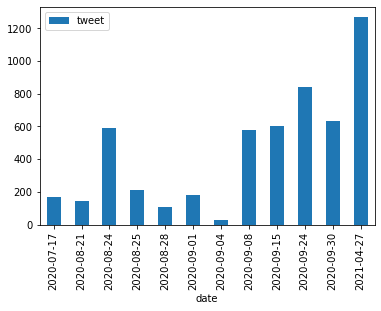

In [49]:
data.plot(kind='bar')